In [51]:
import pandas as pd
import numpy as np
import os 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


### BASIC CHECK

In [52]:
df = pd.read_csv('walkrun.csv')

In [53]:
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [54]:
# dropping date and time columns
df = df.drop(['date', 'time','username'], axis=1)

In [55]:
df

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wrist           88588 non-null  int64  
 1   activity        88588 non-null  int64  
 2   acceleration_x  88588 non-null  float64
 3   acceleration_y  88588 non-null  float64
 4   acceleration_z  88588 non-null  float64
 5   gyro_x          88588 non-null  float64
 6   gyro_y          88588 non-null  float64
 7   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 5.4 MB


In [57]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [58]:
# Check for missing values
df.isnull().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### EDA

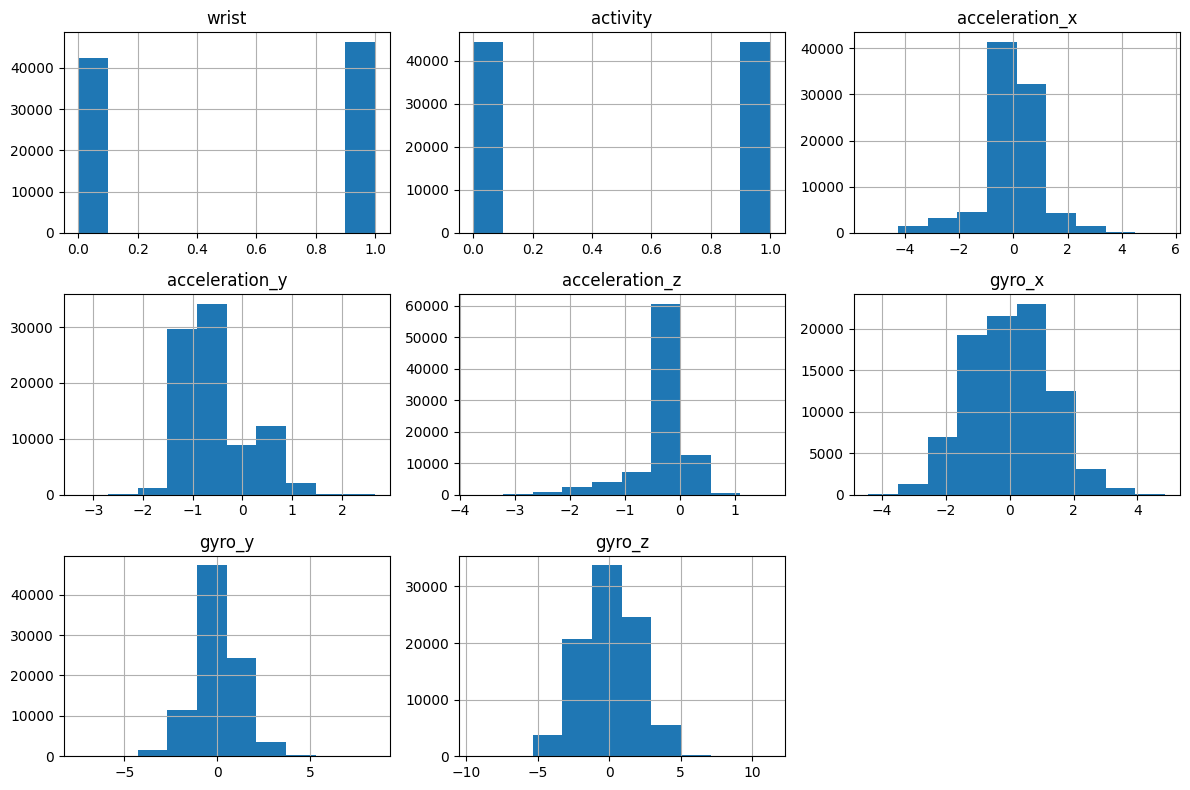

In [59]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

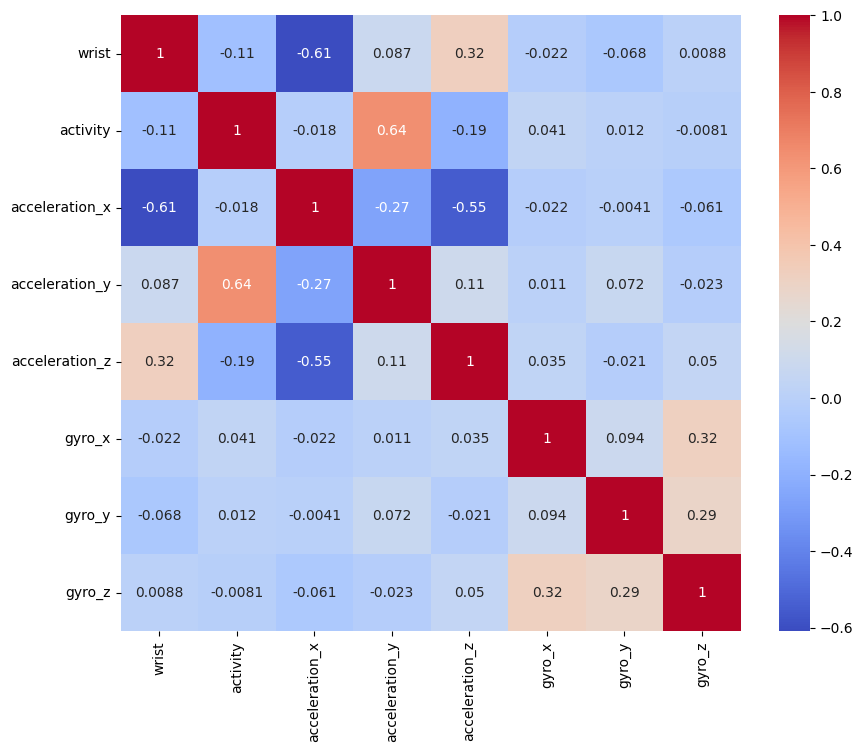

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12652\3723633065.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Activity')


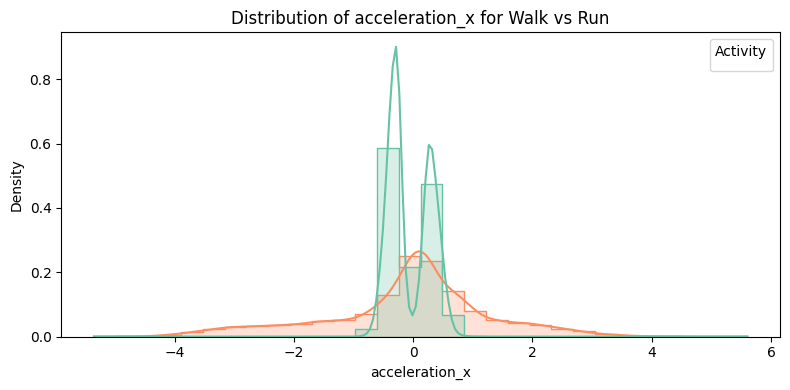

C:\Users\pc\AppData\Local\Temp\ipykernel_12652\3723633065.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Activity')


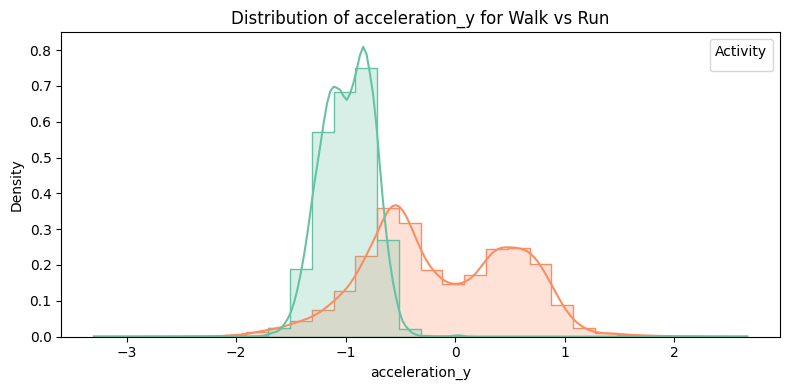

C:\Users\pc\AppData\Local\Temp\ipykernel_12652\3723633065.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Activity')


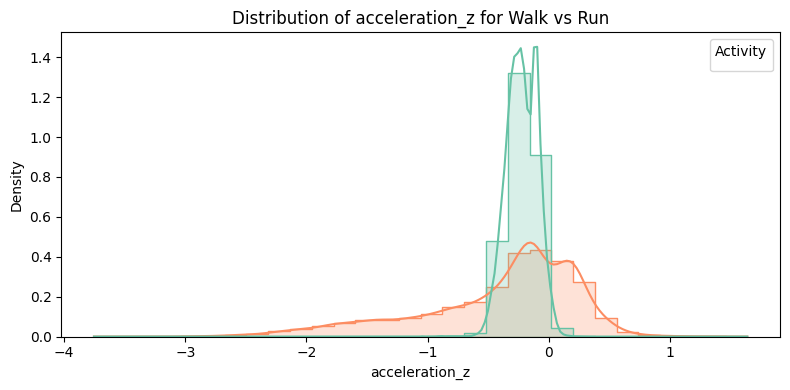

C:\Users\pc\AppData\Local\Temp\ipykernel_12652\3723633065.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Activity')


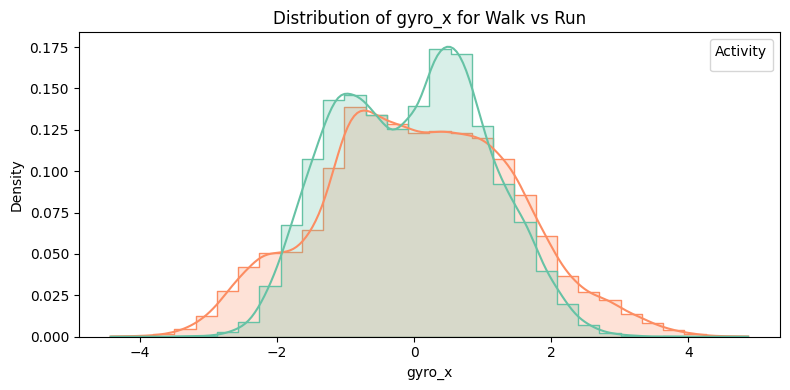

C:\Users\pc\AppData\Local\Temp\ipykernel_12652\3723633065.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Activity')


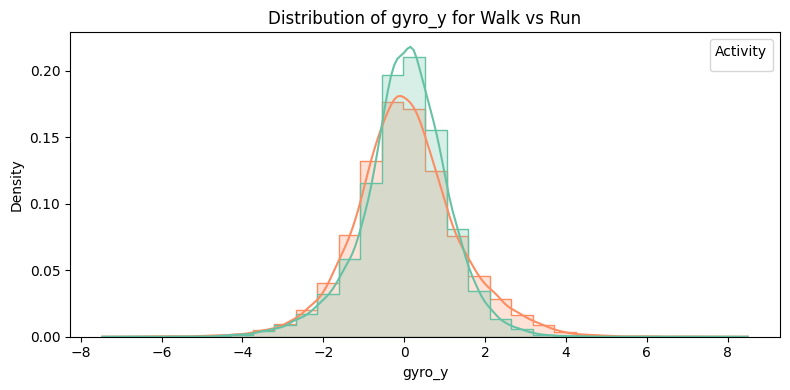

C:\Users\pc\AppData\Local\Temp\ipykernel_12652\3723633065.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Activity')


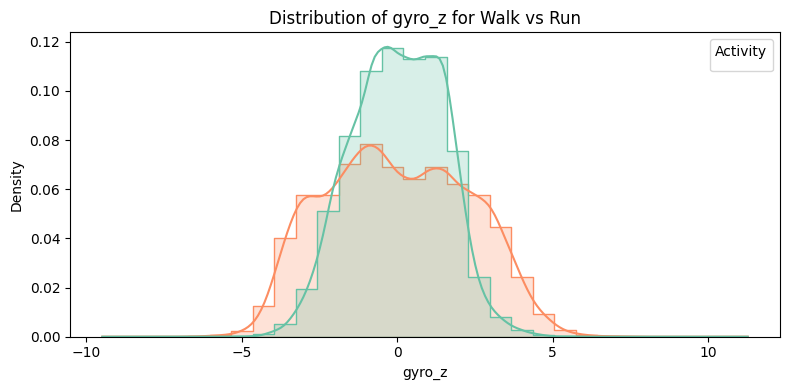

In [61]:

# Sensor features to compare
sensor_features = ['acceleration_x', 'acceleration_y', 'acceleration_z',
                   'gyro_x', 'gyro_y', 'gyro_z']

# Loop through each feature and plot histogram
for col in sensor_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='activity', kde=True, bins=30, palette='Set2', element='step', stat='density')
    plt.title(f'Distribution of {col} for Walk vs Run')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend(title='Activity')
    plt.tight_layout()
    plt.show()



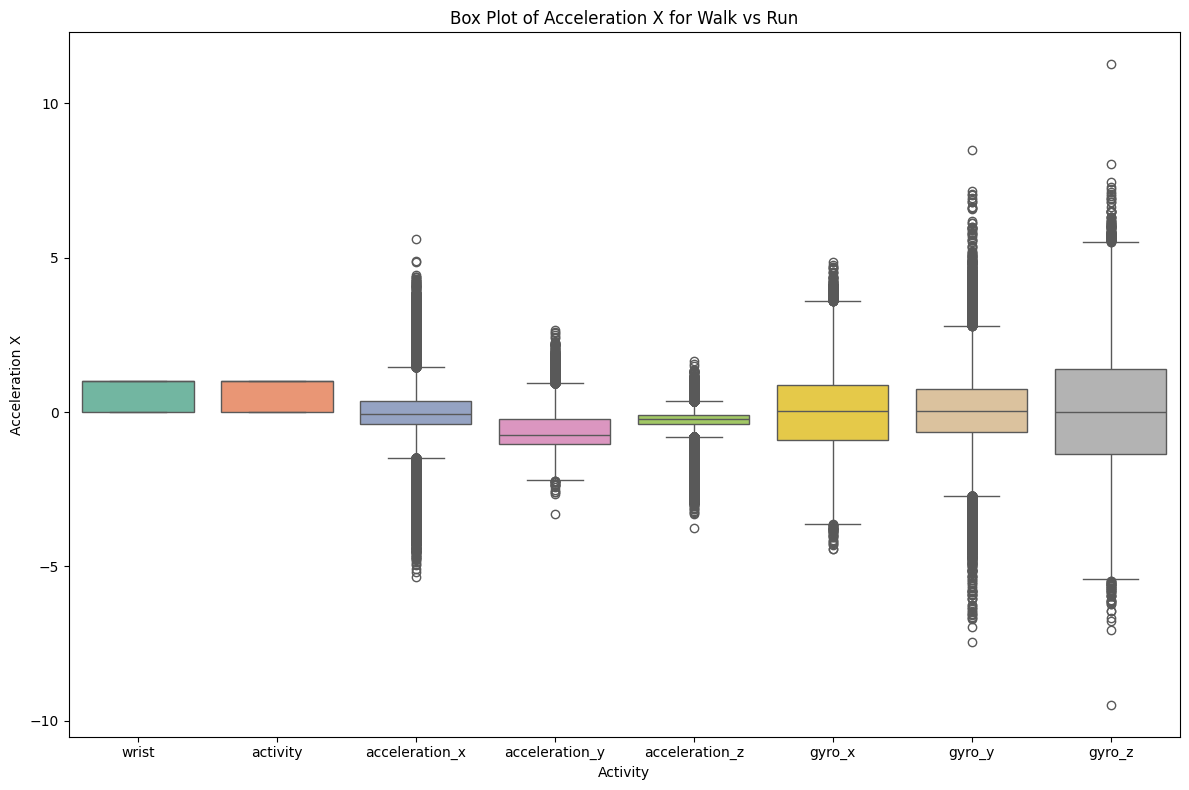

In [62]:
# BOX plot for sensor features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='Set2')
plt.title('Box Plot of Acceleration X for Walk vs Run')
plt.xlabel('Activity')
plt.ylabel('Acceleration X')
plt.tight_layout()
plt.show()

### removing the outliers


In [63]:
# Ensure df is your DataFrame (re-read if needed)
df = pd.read_csv('walkrun.csv')
df = df.drop(['date', 'time','username'], axis=1)

Q1 = df['acceleration_x'].quantile(0.25)
Q3 = df['acceleration_x'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers in 'acceleration_x' by replacing them with the mean
df.loc[(df['acceleration_x'] < lower_bound) | (df['acceleration_x'] > upper_bound), 'acceleration_x'] = df['acceleration_x'].mean()

In [64]:
Q1 = df['acceleration_y'].quantile(0.25)
Q3 = df['acceleration_y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers in 'acceleration_y' by replacing them with the mean
df.loc[(df['acceleration_y'] < lower_bound) | (df['acceleration_y'] > upper_bound), 'acceleration_y'] = df['acceleration_y'].mean()

In [65]:
Q1 = df['acceleration_z'].quantile(0.25)
Q3 = df['acceleration_z'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers in 'acceleration_z' by replacing them with the mean
df.loc[(df['acceleration_z'] < lower_bound) | (df['acceleration_z'] > upper_bound), 'acceleration_z'] = df['acceleration_z'].mean()

In [66]:
Q1 = df['gyro_x'].quantile(0.25)
Q3 = df['gyro_x'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers in 'gyro_x' by replacing them with the mean
df.loc[(df['gyro_x'] < lower_bound) | (df['gyro_x'] > upper_bound), 'gyro_x'] = df['gyro_x'].mean()

In [67]:
Q1 = df['gyro_y'].quantile(0.25)
Q3 = df['gyro_y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers in 'gyro_y' by replacing them with the mean
df.loc[(df['gyro_y'] < lower_bound) | (df['gyro_y'] > upper_bound), 'gyro_y'] = df['gyro_y'].mean()

In [68]:
Q1 = df['gyro_z'].quantile(0.25)
Q3 = df['gyro_z'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Remove outliers in 'gyro_z' by replacing them with the mean
df.loc[(df['gyro_z'] < lower_bound) | (df['gyro_z'] > upper_bound), 'gyro_z'] = df['gyro_z'].mean()

In [69]:
# value counts of the 'activity' column
df['activity'].value_counts()

activity
1    44365
0    44223
Name: count, dtype: int64

### Training the models


In [70]:
x= df.drop('activity', axis=1)
y = df['activity']


In [71]:
# scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [72]:
x_scaled , y

(array([[-1.04536822,  0.59173948, -0.3067708 , ..., -0.04561118,
         -0.00655418, -1.55205554],
        [-1.04536822,  1.47356894, -0.86296966, ..., -0.13988614,
         -0.01810606,  0.05694808],
        [-1.04536822,  0.97050169, -1.44601052, ..., -0.73348718,
          0.06631157, -1.29258298],
        ...,
        [-1.04536822,  1.01121484, -0.95195497, ..., -1.16931701,
         -0.3143083 , -0.67398649],
        [-1.04536822,  0.57874592, -0.43170813, ..., -1.22303839,
          0.41158464, -0.94451388],
        [-1.04536822,  0.69785354, -0.33833049, ...,  0.0976189 ,
          1.03262199,  0.66470031]], shape=(88588, 7)),
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 88583    0
 88584    0
 88585    0
 88586    0
 88587    0
 Name: activity, Length: 88588, dtype: int64)

In [73]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
# Predictions
y_pred = model.predict(x_test)
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Confusion Matrix:
[[7854 1059]
 [1699 7106]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      8913
           1       0.87      0.81      0.84      8805

    accuracy                           0.84     17718
   macro avg       0.85      0.84      0.84     17718
weighted avg       0.85      0.84      0.84     17718

Accuracy: 0.8443390901907665
F1 Score: 0.8441012931406915


In [74]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
# Predictions
y_pred_rf = rf_model.predict(x_test)
# Evaluation
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("F1 Score (Random Forest):", f1_score(y_test, y_pred_rf, average='weighted'))


Confusion Matrix (Random Forest):
[[8826   87]
 [  66 8739]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy (Random Forest): 0.9913647138503217
F1 Score (Random Forest): 0.9913647641072982


In [75]:
from xgboost import XGBClassifier
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)
# Predictions
y_pred_xgb = xgb_model.predict(x_test)
# Evaluation
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("F1 Score (XGBoost):", f1_score(y_test, y_pred_xgb, average='weighted'))

c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix (XGBoost):
[[8846   67]
 [  74 8731]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy (XGBoost): 0.9920419911953945
F1 Score (XGBoost): 0.992041970787923


In [76]:
from sklearn.neural_network import MLPClassifier
# Multi-layer Perceptron Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(x_train, y_train)
# Predictions
y_pred_mlp = mlp_model.predict(x_test)
# Evaluation
print("Confusion Matrix (MLP):")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report (MLP):")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy (MLP):", accuracy_score(y_test, y_pred_mlp))
print("F1 Score (MLP):", f1_score(y_test, y_pred_mlp, average='weighted'))

Confusion Matrix (MLP):
[[8839   74]
 [ 109 8696]]

Classification Report (MLP):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

Accuracy (MLP): 0.9896715204876397
F1 Score (MLP): 0.9896713558082041


In [77]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
# Predictions
y_pred_dt = dt_model.predict(x_test)
# Evaluation
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("F1 Score (Decision Tree):", f1_score(y_test, y_pred_dt, average='weighted'))

Confusion Matrix (Decision Tree):
[[8731  182]
 [ 130 8675]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8913
           1       0.98      0.99      0.98      8805

    accuracy                           0.98     17718
   macro avg       0.98      0.98      0.98     17718
weighted avg       0.98      0.98      0.98     17718

Accuracy (Decision Tree): 0.9823907890281071
F1 Score (Decision Tree): 0.9823909523732446


### VERY HIGH ACCURACY OVERFITTING 

### SO LETS DO HYPERPARAMETER TUNNING

In [79]:
# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_train, y_train)

print("🔍 Best Logistic Regression Params:", grid_lr.best_params_)
print("✅ CV Accuracy:", grid_lr.best_score_)

# Evaluate
y_pred_lr = grid_lr.predict(x_test)
print("🎯 Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔍 Best Logistic Regression Params: {'C': 0.01, 'solver': 'liblinear'}
✅ CV Accuracy: 0.8409058807640472
🎯 Test Accuracy: 0.8446777288633028
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      8913
           1       0.87      0.80      0.84      8805

    accuracy                           0.84     17718
   macro avg       0.85      0.84      0.84     17718
weighted avg       0.85      0.84      0.84     17718



In [80]:
# hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train, y_train)
print("🔍 Best Random Forest Params:", grid_rf.best_params_)
print("✅ CV Accuracy:", grid_rf.best_score_)
# Evaluate
y_pred_rf = grid_rf.predict(x_test)
print("🎯 Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔍 Best Random Forest Params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
✅ CV Accuracy: 0.990729489193554
🎯 Test Accuracy: 0.99153403318659
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718



In [83]:
# hyperparameter tuning for mlp
from sklearn.neural_network import MLPClassifier

mlp_params = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],  # regularization
    'solver': ['adam']
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), mlp_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_mlp.fit(x_train, y_train)

print("🔍 Best MLP Params:", grid_mlp.best_params_)
print("✅ CV Accuracy:", grid_mlp.best_score_)

# Evaluate
y_pred_mlp = grid_mlp.predict(x_test)
print("🎯 Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


🔍 Best MLP Params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'solver': 'adam'}
✅ CV Accuracy: 0.9902215108766548
🎯 Test Accuracy: 0.9911389547352975
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8913
           1       0.99      0.99      0.99      8805

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

